In [ ]:
# The code below produces a plot of the Pseudo Jacobi Poisson flow as described in the paper:
# "Visualising the flows of orthogonal polynomial expansions of the Riemann Xi-function".
# The program reads the file with pre-computed coefficients and produces an implicit plot, 
# i.e. it visualises the flow of the real roots when r varies. 
# Version June 1, 2024. 

Automated checks:
The sum of all the Re coefficients is : Re: 0.5087310387263240 = Xi(i) = 0.5087310387263240
The sum of all the Im coefficients is : Im: -0.0000000000000000 = 0
d/dr z_1(0) via Newton approximation  : -13238.527774 versus formula: -13237.963874 (should be close).
Ensure 20 digits accuracy at t = 60   : -0.00000000000000000000 (should show 20 zeros).


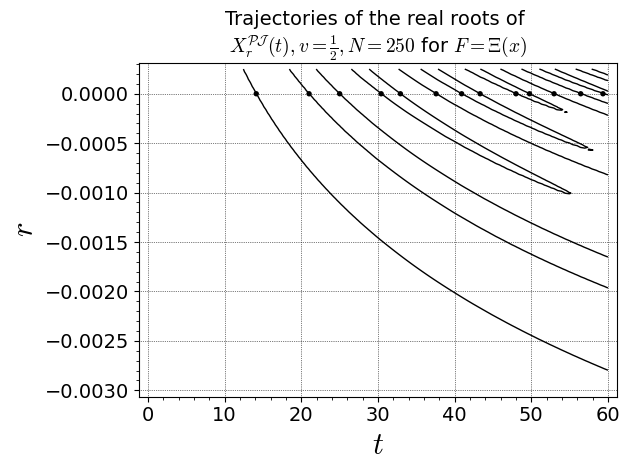

In [45]:
import csv

var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(512)
global m1; m1 = []; CoeffSumRe = RDF(0); CoeffSumIm = RDF(0);
with open('PseudoJacobiCoeffa12N250') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    real = []; 
    imag = [];
    for row in readCSV:
        re = RDF(row[0])
        im = RDF(row[1])
        CoeffSumRe = CoeffSumRe + re
        CoeffSumIm = CoeffSumIm + im
        real.append([re])
        imag.append([im])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,N,n):
    f1=CCF("0.5",0)-I*CCF(t/2);
    f2=CCF(-N,a);
    hyp=CCF(f1).hypergeometric([-n,n-2*N-1],[f2])
    return hyp

def PseudoJacobiFlow(t,r):
    sum=CCF(0)
    for n in range(251):
        h = n - CCF("500") - 1
        r1 = CCF(-r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(real[n]),str(imag[n]))*hyp(t,CCF("0.5"),250,n)
    return real_part(sum)

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (PseudoJacobiFlow(x0 + tr*100,tr) - PseudoJacobiFlow(x0,tr))/(tr*100)
        h = PseudoJacobiFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,300001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(300000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return 2*(1+ordrho[k-1]^2)*sumzeros(k) +2*(0.5 - 250*ordrho[k-1])

print("Automated checks:")
print("The sum of all the Re coefficients is : Re: %3.16f = Xi(i) = %3.16f" % (CoeffSumRe, PseudoJacobiFlow(I,0)))
print("The sum of all the Im coefficients is : Im: %3.16f = 0" % CoeffSumIm)
print("d/dr z_1(0) via Newton approximation  : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60   : %3.20f (should show 20 zeros)." % real_part(PseudoJacobiFlow(60,0)-Xi(60)))

a1=implicit_plot(lambda t,r:((RDF(PseudoJacobiFlow(t,r)))),(t,0,60),(r,-0.003,0.00025),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{PJ}}_r(t), v=\frac{1}{2}, N=250$ for $F=\Xi(x)$', gridlines=True,plot_points=120)
show(a1 + z,aspect_ratio='automatic')

Automated checks:
The sum of all the Re coefficients is : Re: 1.0421906109874948 = Xin(i) = 1.0421906109874948
The sum of all the Im coefficients is : Im: -0.0000000000000000 = 0
d/dr z_1(0) via Newton approximation  : -9461.583176 versus formula: -9461.583176 (should be close).
Ensure 20 digits accuracy at t = 60   : -0.00000000000000000000 (should show 20 zeros).


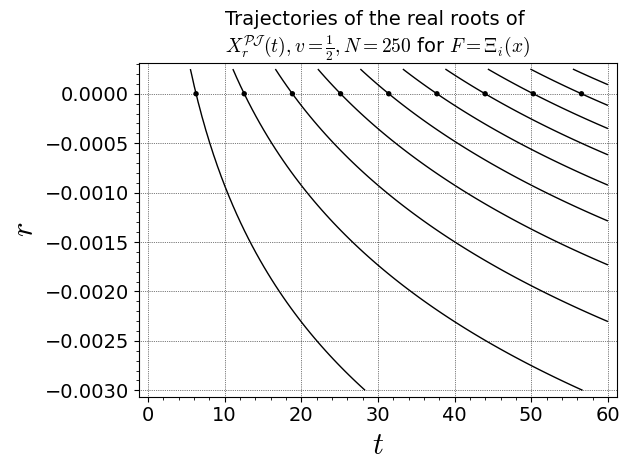

In [46]:
import csv

var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),0])
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(512)
global m1; m1 = []; CoeffSumRe = RDF(0); CoeffSumIm = RDF(0);
with open('PseudoJacobiCoeffa12N250int') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    real = []; 
    imag = [];
    for row in readCSV:
        re = RDF(row[0])
        im = RDF(row[1])
        CoeffSumRe = CoeffSumRe + re
        CoeffSumIm = CoeffSumIm + im
        real.append([re])
        imag.append([im])

CCF=ComplexBallField(1024)
def Xin(t):
    Xin=2*CCF(t/2).sin()/CCF(t)
    return Xin

def hyp(t,a,N,n):
    f1=CCF("0.5",0)-I*CCF(t/2);
    f2=CCF(-N,a);
    hyp=CCF(f1).hypergeometric([-n,n-2*N-1],[f2])
    return hyp

def PseudoJacobiFlow(t,r):
    sum=CCF(0)
    for n in range(251):
        h = n - CCF("500") - 1
        r1 = CCF(-r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(real[n]),str(imag[n]))*hyp(t,CCF("0.5"),250,n)
    return real_part(sum)

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000000001");x0 = 2*k*RDF.pi();
    while(y):
        hd = (PseudoJacobiFlow(x0 + tr*100,tr) - PseudoJacobiFlow(x0,tr))/(tr*100)
        h = PseudoJacobiFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - 2*k*RDF.pi())/(tr) 
    return dzdr3

#compute d/dr zk via formula
def verifyPDE(k):
    return -2*(1+(2*k*pi())^2)/(2*k*pi()) + 2*(0.5 - 250*2*k*pi())

print("Automated checks:")
print("The sum of all the Re coefficients is : Re: %3.16f = Xin(i) = %3.16f" % (CoeffSumRe, PseudoJacobiFlow(I,0)))
print("The sum of all the Im coefficients is : Im: %3.16f = 0" % CoeffSumIm)
print("d/dr z_1(0) via Newton approximation  : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60   : %3.20f (should show 20 zeros)." % real_part(PseudoJacobiFlow(60,0)-Xin(60)))

a1i=implicit_plot(lambda t,r:((RDF(PseudoJacobiFlow(t,r)))),(t,0,60),(r,-0.003,0.00025),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{PJ}}_r(t), v=\frac{1}{2}, N=250$ for $F=\Xi_i(x)$',gridlines=True,plot_points=120)
show(a1i + z,aspect_ratio='automatic')